<a href="https://colab.research.google.com/github/winDcodes0/datacleaning/blob/main/Restaurant_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

# Load the dataset
file_path = "restaurants.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()
df.tail()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6593 entries, 0 to 6592
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      6593 non-null   object 
 1   Location  6593 non-null   object 
 2   Locality  6593 non-null   object 
 3   City      6593 non-null   object 
 4   Cuisine   6593 non-null   object 
 5   Rating    6593 non-null   float64
 6   Votes     6593 non-null   int64  
 7   Cost      6593 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 412.2+ KB


In [ ]:
# Cleaning and preprocessing
df.columns = df.columns.str.strip()
df['City'] = df['City'].str.strip()
df['Locality'] = df['Locality'].str.strip()
df['Cuisine'] = df['Cuisine'].astype(str).str.strip()
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Cost'] = pd.to_numeric(df['Cost'], errors='coerce')

# Remove NaNs that may impact analysis
df.dropna(subset=['City', 'Locality', 'Rating', 'Cost'], inplace=True)

# Summary of cleaned data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6593 entries, 0 to 6592
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      6593 non-null   object 
 1   Location  6593 non-null   object 
 2   Locality  6593 non-null   object 
 3   City      6593 non-null   object 
 4   Cuisine   6593 non-null   object 
 5   Rating    6593 non-null   float64
 6   Votes     6593 non-null   int64  
 7   Cost      6593 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 412.2+ KB


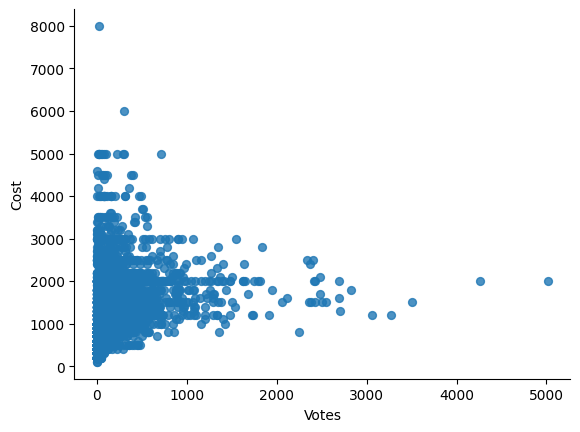

In [ ]:
df.plot(kind='scatter', x='Votes', y='Cost', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-6-7684fa80dc60>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index, y=city_counts.values, palette="viridis")


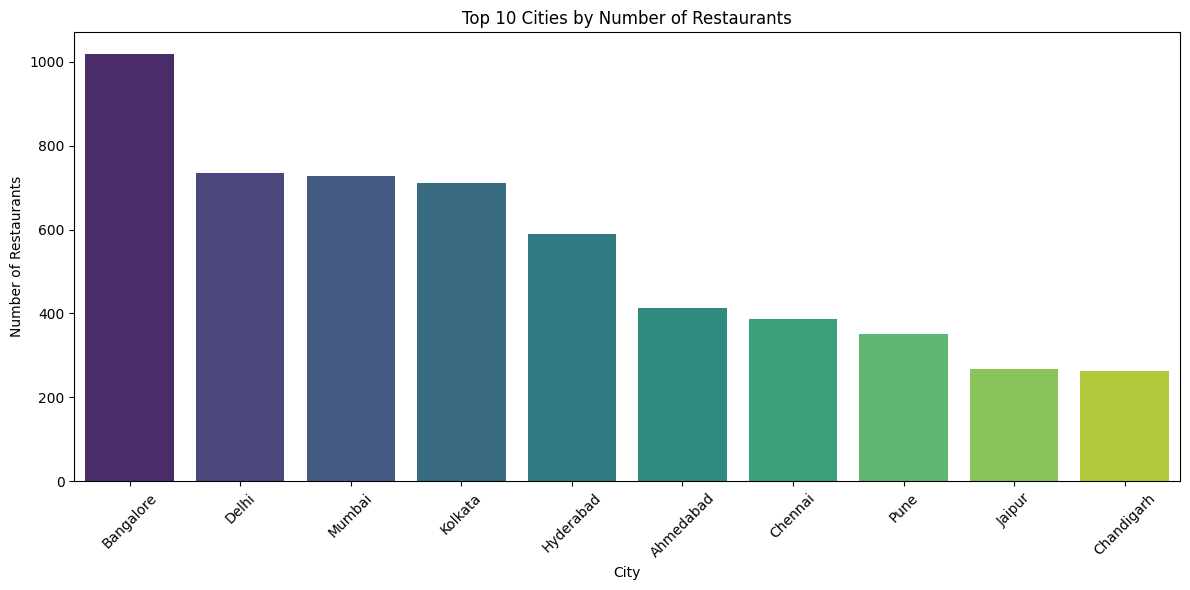

<ipython-input-6-7684fa80dc60>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=locality_counts.index, y=locality_counts.values, palette="coolwarm")


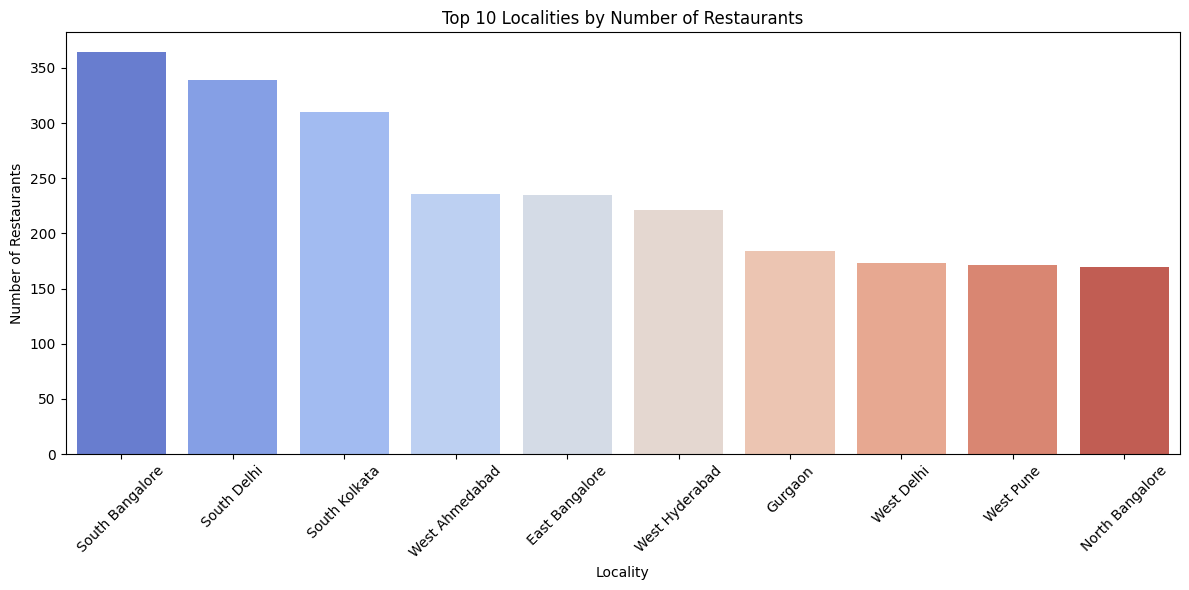

(City
 Bangalore     1019
 Delhi          734
 Mumbai         727
 Kolkata        712
 Hyderabad      589
 Ahmedabad      414
 Chennai        388
 Pune           351
 Jaipur         268
 Chandigarh     264
 Name: count, dtype: int64,
 Locality
 South Bangalore    364
 South Delhi        339
 South Kolkata      310
 West Ahmedabad     236
 East Bangalore     235
 West Hyderabad     221
 Gurgaon            184
 West Delhi         173
 West Pune          171
 North Bangalore    170
 Name: count, dtype: int64)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Market Demand and Competition

# Count of restaurants by city
city_counts = df['City'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=city_counts.index, y=city_counts.values, palette="viridis")
plt.title("Top 10 Cities by Number of Restaurants")
plt.ylabel("Number of Restaurants")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Count of restaurants by locality (Top 10)
locality_counts = df['Locality'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=locality_counts.index, y=locality_counts.values, palette="coolwarm")
plt.title("Top 10 Localities by Number of Restaurants")
plt.ylabel("Number of Restaurants")
plt.xlabel("Locality")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Displaying raw count tables
city_counts, locality_counts


<ipython-input-7-b3fe0abf5335>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_cost_city.head(10).values, y=avg_cost_city.head(10).index, palette='coolwarm')


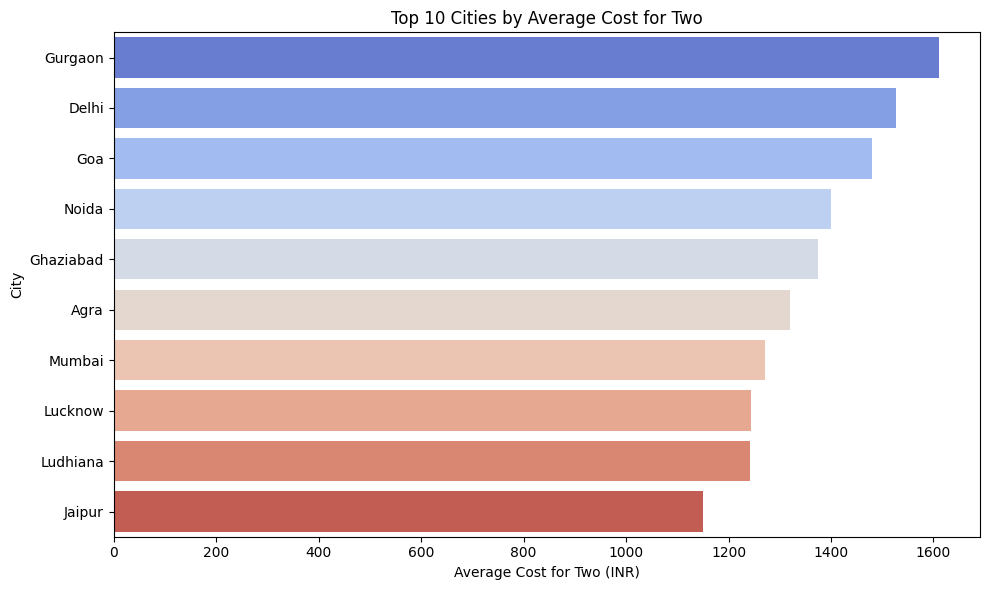

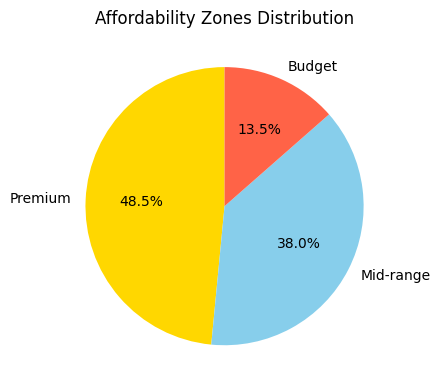

(City
 Gurgaon      1610.326087
 Delhi        1526.634877
 Goa          1480.000000
 Noida        1399.315068
 Ghaziabad    1374.000000
 Agra         1320.000000
 Mumbai       1271.733150
 Lucknow      1243.750000
 Ludhiana     1241.935484
 Jaipur       1149.253731
 Name: Cost, dtype: float64,
 affordability
 Premium      3196
 Mid-range    2505
 Budget        892
 Name: count, dtype: int64)

In [ ]:
# --- Affordability Analysis  ---

# Clean 'Cost' column (remove commas and convert to float)
df_clean = df.copy()
df_clean['Cost'] = df_clean['Cost'].astype(str).str.replace(',', '').astype(float)

# Average cost for two per city
avg_cost_city = df_clean.groupby('City')['Cost'].mean().sort_values(ascending=False)

# Categorize into premium, mid-range, and budget
def affordability_category(cost):
    if cost >= 1000:
        return 'Premium'
    elif 500 <= cost < 1000:
        return 'Mid-range'
    else:
        return 'Budget'

df_clean['affordability'] = df_clean['Cost'].apply(affordability_category)
affordability_counts = df_clean['affordability'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_cost_city.head(10).values, y=avg_cost_city.head(10).index, palette='coolwarm')
plt.title('Top 10 Cities by Average Cost for Two')
plt.xlabel('Average Cost for Two (INR)')
plt.ylabel('City')
plt.tight_layout()
plt.show()

# Affordability zone distribution
plt.figure(figsize=(6, 4))
affordability_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['gold', 'skyblue', 'tomato'])
plt.title('Affordability Zones Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Display results
avg_cost_city.head(10), affordability_counts


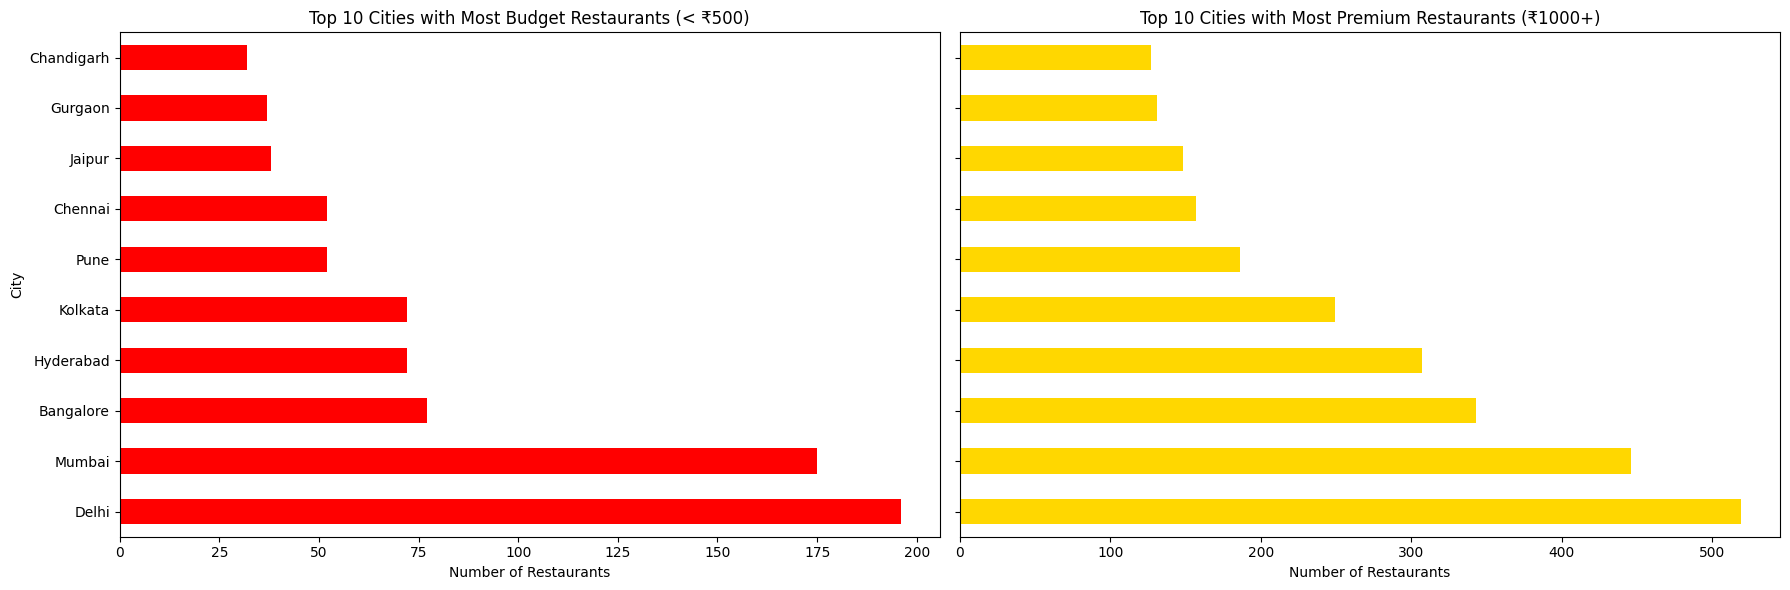

In [ ]:
# Count of restaurants per affordability zone per city
zone_city_counts = df_clean.groupby(['City', 'affordability']).size().unstack(fill_value=0)

# Top cities with most budget restaurants
top_budget_cities = zone_city_counts.sort_values('Budget', ascending=False).head(10)

# Top cities with most premium restaurants
top_premium_cities = zone_city_counts.sort_values('Premium', ascending=False).head(10)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

top_budget_cities['Budget'].plot(kind='barh', ax=axes[0], color='red')
axes[0].set_title('Top 10 Cities with Most Budget Restaurants (< ₹500)')
axes[0].set_xlabel('Number of Restaurants')
axes[0].invert_yaxis()

top_premium_cities['Premium'].plot(kind='barh', ax=axes[1], color='gold')
axes[1].set_title('Top 10 Cities with Most Premium Restaurants (₹1000+)')
axes[1].set_xlabel('Number of Restaurants')

plt.tight_layout()
plt.show()


In [ ]:
# --- Customer Rating Analysis ---

# 1. Average customer rating for each city and locality
avg_rating_city = df.groupby('City')['Rating'].mean().sort_values(ascending=False)
avg_rating_locality = df.groupby('Locality')['Rating'].mean().sort_values(ascending=False)

# 2. Highlight cities/localities with consistently high average ratings (above 4)
high_rated_cities = avg_rating_city[avg_rating_city >= 4]
high_rated_localities = avg_rating_locality[avg_rating_locality >= 4]

# --- Cuisine Popularity Mapping ---

# 3. Most common cuisine in each city
# Expand cuisines for accurate counting
df['Cuisine'] = df['Cuisine'].astype(str)
cuisine_exploded = df.assign(Cuisine=df['Cuisine'].str.split(',')).explode('Cuisine')
cuisine_exploded['Cuisine'] = cuisine_exploded['Cuisine'].str.strip()

most_common_cuisine_per_city = (
    cuisine_exploded.groupby(['City', 'Cuisine'])
    .size()
    .reset_index(name='Count')
    .sort_values(['City', 'Count'], ascending=[True, False])
    .drop_duplicates('City')
)

# 4. Identify cuisine gaps: cuisines with very low counts in each city (potential opportunity)
# We'll take cuisines with low representation (<5 restaurants per city)
low_rep_cuisines = (
    cuisine_exploded.groupby(['City', 'Cuisine'])
    .size()
    .reset_index(name='Count')
)
underrepresented_cuisines = low_rep_cuisines[low_rep_cuisines['Count'] < 5]

# Output summaries
{
    "Top rated cities (avg rating >= 4)": high_rated_cities.head(10),
    "Top rated localities (avg rating >= 4)": high_rated_localities.head(10),
    "Most common cuisine per city": most_common_cuisine_per_city,
    "Underrepresented cuisines": underrepresented_cuisines.head(10)
}

{'Top rated cities (avg rating >= 4)': City
 Gurgaon       4.308696
 Agra          4.238667
 Ahmedabad     4.202899
 Noida         4.193836
 Mumbai        4.180330
 Delhi         4.176567
 Goa           4.153333
 Chandigarh    4.137500
 Nagpur        4.136364
 Vadodara      4.131868
 Name: Rating, dtype: float64,
 'Top rated localities (avg rating >= 4)': Locality
 East Surat         4.700000
 West Agra          4.440000
 West Vadodara      4.376923
 Bandra             4.325676
 Powai              4.323077
 North Agra         4.317391
 Gurgaon            4.308696
 North Nagpur       4.300000
 East Nagpur        4.300000
 Central Udaipur    4.263636
 Name: Rating, dtype: float64,
 'Most common cuisine per city':            City       Cuisine  Count
 18         Agra  North Indian     52
 60    Ahmedabad  North Indian    200
 126   Bangalore  North Indian    417
 177  Chandigarh  North Indian    132
 227     Chennai  North Indian    188
 292       Delhi  North Indian    425
 329   Ghaziab

<ipython-input-16-6b2296082d28>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index, y=city_counts.values, palette="viridis")
<ipython-input-16-6b2296082d28>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=locality_counts.index, y=locality_counts.values, palette="coolwarm")


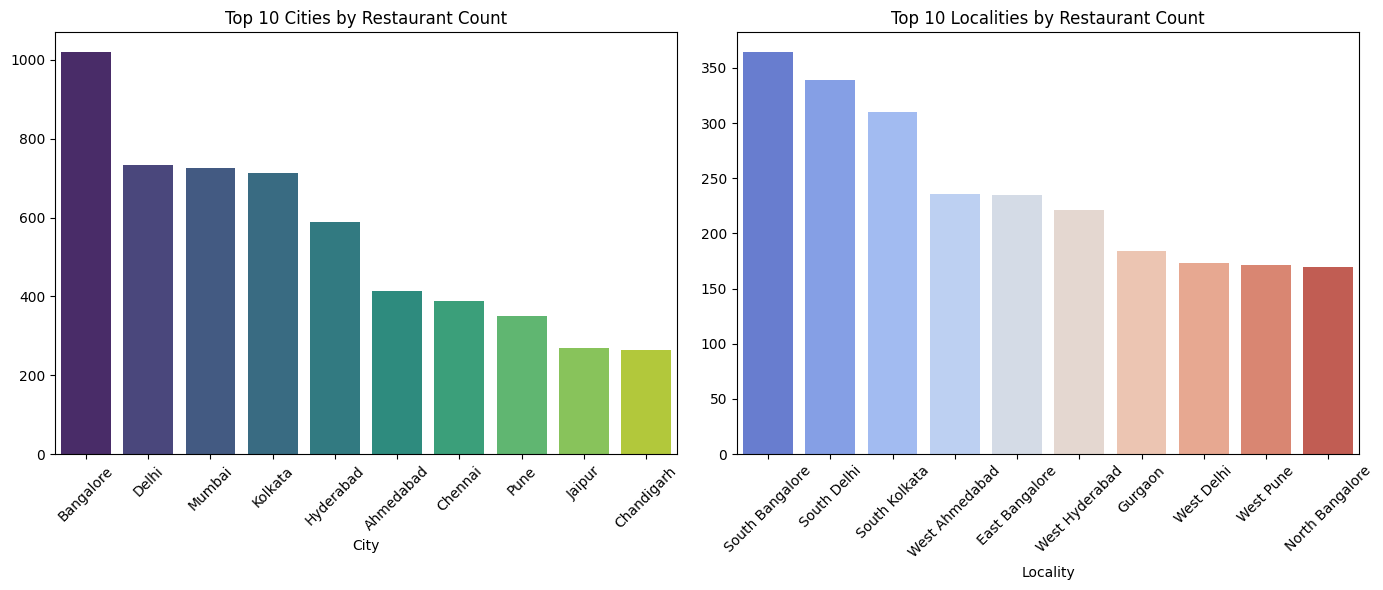

<ipython-input-16-6b2296082d28>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='affordability', y='Cost', data=df_clean, palette=['gold', 'skyblue', 'tomato'])


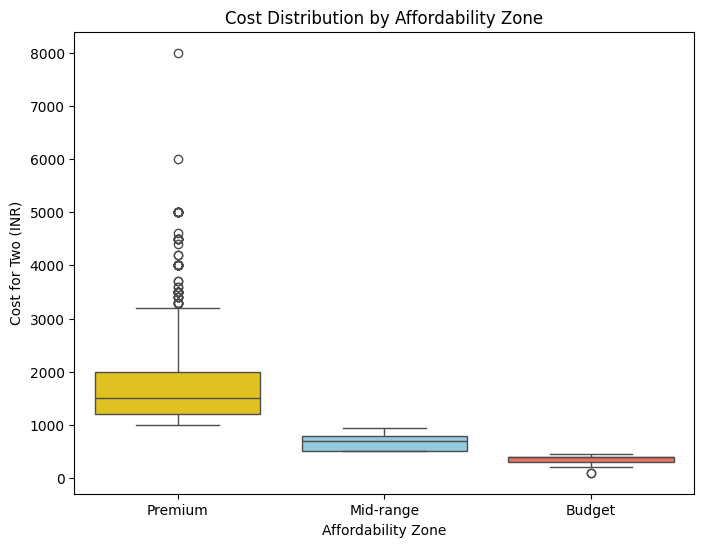

<ipython-input-16-6b2296082d28>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='City', y='Rating', data=df.loc[df['City'].isin(avg_rating_city.head(10).index)], palette="magma")


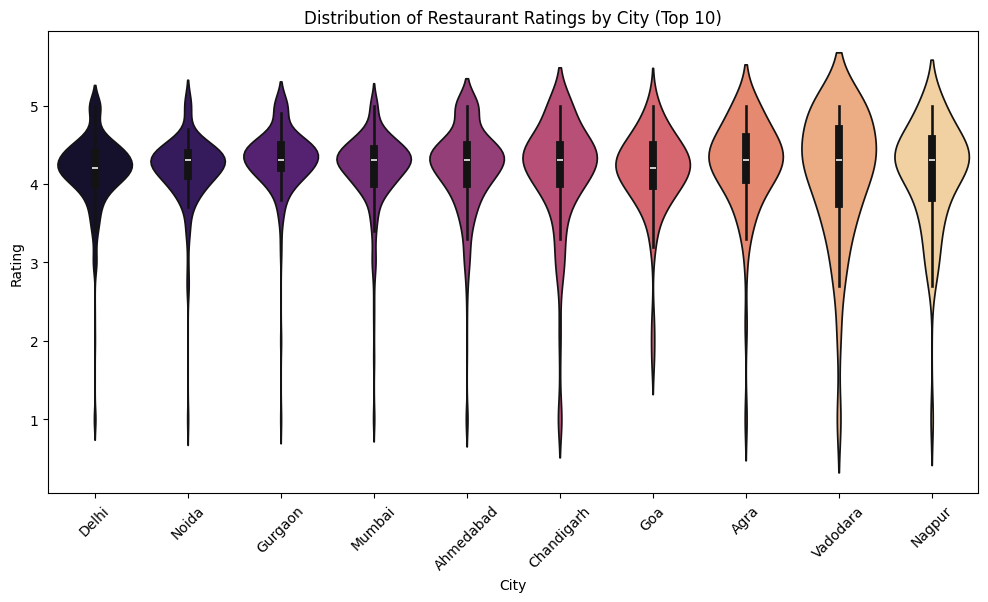

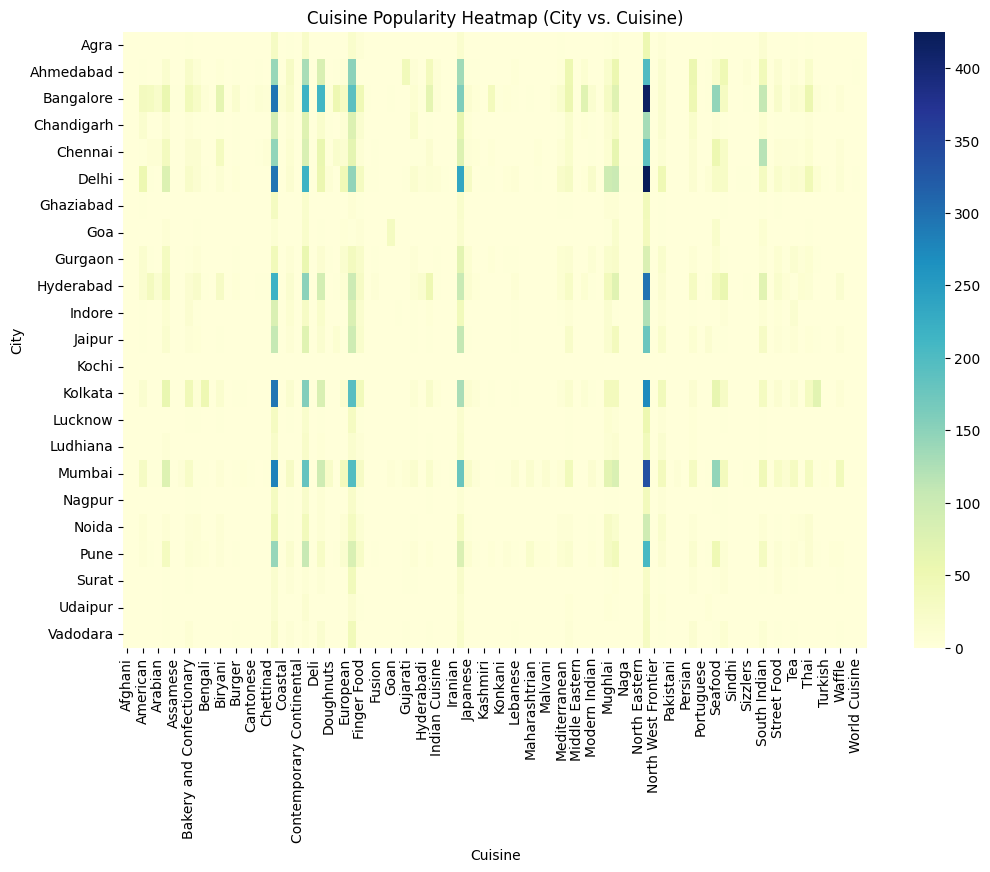

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns



# 2.  Combined Bar Plots for City and Locality Counts
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=city_counts.index, y=city_counts.values, palette="viridis")
plt.title("Top 10 Cities by Restaurant Count")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=locality_counts.index, y=locality_counts.values, palette="coolwarm")
plt.title("Top 10 Localities by Restaurant Count")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# 3.  Box Plot for Cost Distribution by Affordability Zone
plt.figure(figsize=(8, 6))
sns.boxplot(x='affordability', y='Cost', data=df_clean, palette=['gold', 'skyblue', 'tomato'])
plt.title('Cost Distribution by Affordability Zone')
plt.xlabel('Affordability Zone')
plt.ylabel('Cost for Two (INR)')
plt.show()

# 4.  Violin Plots for Rating Distribution by City (Top 10)
plt.figure(figsize=(12, 6))
sns.violinplot(x='City', y='Rating', data=df.loc[df['City'].isin(avg_rating_city.head(10).index)], palette="magma")
plt.title("Distribution of Restaurant Ratings by City (Top 10)")
plt.xticks(rotation=45)
plt.show()

# 5.  Heatmap for Cuisine Popularity (City vs. Cuisine)
cuisine_city_matrix = cuisine_exploded.groupby(['City', 'Cuisine']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(cuisine_city_matrix, cmap="YlGnBu", annot=False)
plt.title("Cuisine Popularity Heatmap (City vs. Cuisine)")
plt.show()


<ipython-input-18-fbb69465648e>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='final_score', y='City', data=top_franchise_locations, palette='viridis')


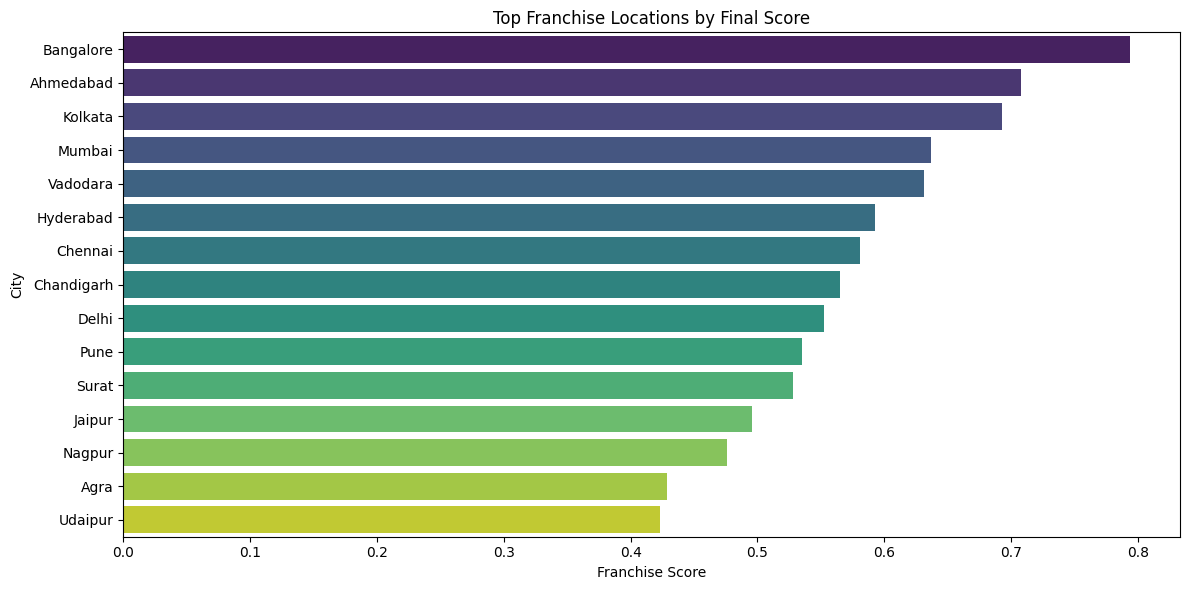

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv("restaurants.csv")

# Cleaning column names
df.columns = df.columns.str.strip()

# Calculate average rating per city
avg_rating_city = df.groupby('City')['Rating'].mean().reset_index().rename(columns={'Rating': 'avg_rating'})

# Calculate average cost per city
avg_cost_city = df.groupby('City')['Cost'].mean().reset_index().rename(columns={'Cost': 'avg_cost_for_two'})

# Count number of restaurants per city
restaurant_count_city = df['City'].value_counts().reset_index()
restaurant_count_city.columns = ['City', 'restaurant_count']

# Merging all metrics
metrics = avg_rating_city.merge(avg_cost_city, on='City').merge(restaurant_count_city, on='City')

# Normalizing values for scoring
scaler = MinMaxScaler()
normalized = scaler.fit_transform(metrics[['avg_rating', 'avg_cost_for_two', 'restaurant_count']])
metrics[['rating_score', 'cost_score', 'demand_score']] = normalized

# Final franchise score
metrics['final_score'] = (metrics['rating_score'] + (1 - metrics['cost_score']) + metrics['demand_score']) / 3

# Sort and get top 15 franchise locations
top_franchise_locations = metrics.sort_values(by='final_score', ascending=False).head(15)

# Create visualizations
plt.figure(figsize=(12, 6))
sns.barplot(x='final_score', y='City', data=top_franchise_locations, palette='viridis')
plt.title('Top Franchise Locations by Final Score')
plt.xlabel('Franchise Score')
plt.ylabel('City')
plt.tight_layout()

# Interactive plot with Plotly
interactive_fig = px.bar(top_franchise_locations,
                         x='final_score',
                         y='City',
                         orientation='h',
                         color='final_score',
                         title='Top Franchise Locations (Interactive)',
                         labels={'final_score': 'Franchise Score', 'City': 'City'},
                         height=600)

plt.show()
interactive_fig.show()

